<a href="https://colab.research.google.com/github/redha-abushaheen/testing/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis

In [ ]:
import pandas as pd
import numpy as np
train_data = pd.read_csv('news-train.csv')
test_data = pd.read_csv('news-test.csv')

In [ ]:
#import library
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

This code snippet demonstrates text preprocessing and the evaluation of Decision Tree classifiers with different impurity criteria (e.g., gini and entropy).
It aims to determine the criterion that yields the highest classification accuracy for a text classification task.
The code includes data loading, text cleaning, tokenization, stop word removal, TF-IDF vectorization, and visualization of accuracy scores.
By comparing the training and validation accuracies, it helps identify the most suitable impurity criterion for decision tree classification.


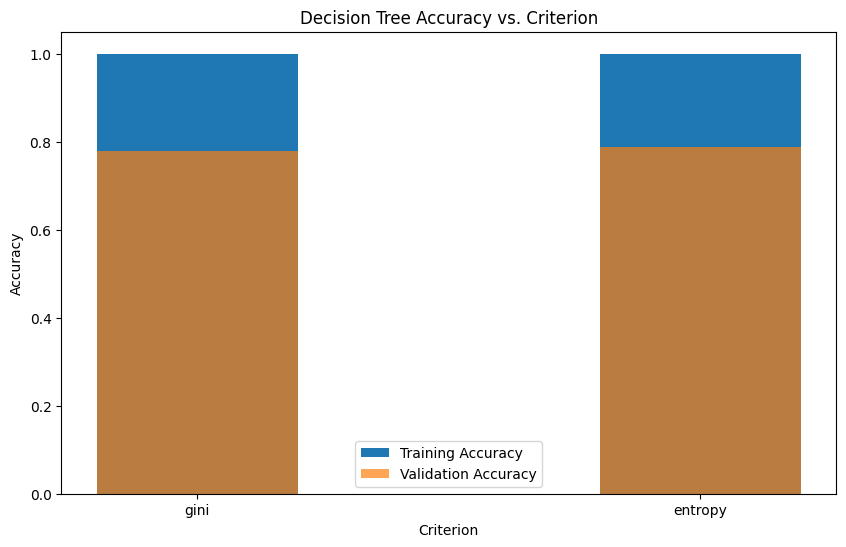

In [ ]:



# Load the training data
train_data = pd.read_csv('news-train.csv')

# Step 1: Text Cleaning
def clean_text(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word.isalpha()])
    return text

train_data['Text'] = train_data['Text'].apply(clean_text)

# Step 2: Tokenization
def tokenize_text(text):
    words = word_tokenize(text)
    return words

train_data['Text'] = train_data['Text'].apply(tokenize_text)

# Step 3: Stop Word Removal
stop_words = set(stopwords.words('english'))

def remove_stop_words(words):
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

train_data['Text'] = train_data['Text'].apply(remove_stop_words)

# Step 4: Join Tokenized Words Back into a Single String
train_data['Text'] = train_data['Text'].apply(lambda x: ' '.join(x))

# Step 5: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Text'])
y_train = train_data['Category']

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

# Define criterion values to test
criteria = ["gini", "entropy"]
train_accuracies = []
val_accuracies = []

# Iterate through different criterion values
for criterion in criteria:
    # Create a Decision Tree classifier with the specified criterion
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)

    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Predict on the training and validation data
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)

    # Calculate training and validation accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Append accuracies to the respective lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plot the training and validation accuracies for different criterion values
plt.figure(figsize=(10, 6))
plt.bar(criteria, train_accuracies, width=0.4, label='Training Accuracy')
plt.bar(criteria, val_accuracies, width=0.4, label='Validation Accuracy', alpha=0.7)
plt.xlabel('Criterion')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Criterion')
plt.legend()
plt.show()


In [ ]:

# Load the training data
train_data = pd.read_csv('news-train.csv')

# Step 1: Text Cleaning
def clean_text(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word.isalpha()])
    return text

train_data['Text'] = train_data['Text'].apply(clean_text)

# Step 2: Tokenization
def tokenize_text(text):
    words = word_tokenize(text)
    return words

train_data['Text'] = train_data['Text'].apply(tokenize_text)

# Step 3: Stop Word Removal
stop_words = set(stopwords.words('english'))

def remove_stop_words(words):
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

train_data['Text'] = train_data['Text'].apply(remove_stop_words)

# Step 4: Join Tokenized Words Back into a Single String
train_data['Text'] = train_data['Text'].apply(lambda x: ' '.join(x))

# Step 5: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Text'])
y_train = train_data['Category']

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

# Define min_samples_leaf values to test
min_samples_leaf_values = [10, 50, 100, 200, 500]

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['min_samples_leaf', 'avg_training_accuracy', 'std_training_accuracy', 'avg_validation_accuracy', 'std_validation_accuracy'])

# Iterate through different min_samples_leaf values
for min_samples_leaf in min_samples_leaf_values:
    # Create a Decision Tree classifier with the specified min_samples_leaf
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)

    # Split the data into training and validation sets for cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Fit the model on the training data
        clf.fit(X_train_fold, y_train_fold)

        # Calculate training and validation accuracies
        train_accuracy = clf.score(X_train_fold, y_train_fold)
        val_accuracy = clf.score(X_val_fold, y_val_fold)

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    # Calculate the average and standard deviation of training accuracies
    avg_train_accuracy = np.mean(train_accuracies)
    std_train_accuracy = np.std(train_accuracies)

    # Calculate the average and standard deviation of validation accuracies
    avg_val_accuracy = np.mean(val_accuracies)
    std_val_accuracy = np.std(val_accuracies)

    # Append the results to the DataFrame
    results_df = results_df.append({
        'min_samples_leaf': min_samples_leaf,
        'avg_training_accuracy': avg_train_accuracy,
        'std_training_accuracy': std_train_accuracy,
        'avg_validation_accuracy': avg_val_accuracy,
        'std_validation_accuracy': std_val_accuracy
    }, ignore_index=True)

# Display the corrected results in a table
print(results_df)

<ipython-input-4-0e9b887f8dea>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-4-0e9b887f8dea>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-4-0e9b887f8dea>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


   min_samples_leaf  avg_training_accuracy  std_training_accuracy  \
0              10.0               0.840882               0.007748   
1              50.0               0.675294               0.029725   
2             100.0               0.503529               0.005778   
3             200.0               0.377353               0.006616   
4             500.0               0.231765               0.005310   

   avg_validation_accuracy  std_validation_accuracy  
0                 0.748235                 0.009412  
1                 0.645882                 0.040482  
2                 0.492941                 0.026672  
3                 0.372941                 0.029669  
4                 0.231765                 0.021242  


<ipython-input-4-0e9b887f8dea>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-4-0e9b887f8dea>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


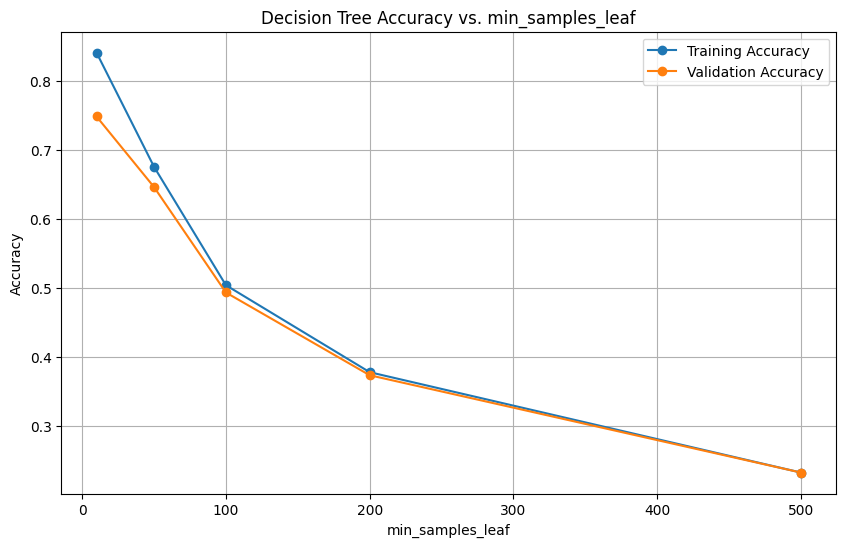

In [ ]:

# Extract the min_samples_leaf values and accuracy values from the results DataFrame
min_samples_leaf_values = results_df['min_samples_leaf']
avg_training_accuracies = results_df['avg_training_accuracy']
avg_validation_accuracies = results_df['avg_validation_accuracy']

# Create a line chart with both training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, avg_training_accuracies, marker='o', label='Training Accuracy')
plt.plot(min_samples_leaf_values, avg_validation_accuracies, marker='o', label='Validation Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. min_samples_leaf')
plt.legend()
plt.grid(True)
plt.show()



# Using 5 Fold

In [ ]:
# Define max_features values to test
max_features_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['max_features', 'avg_training_accuracy', 'std_training_accuracy', 'avg_validation_accuracy', 'std_validation_accuracy'])

# Iterate through different max_features values
for max_features in max_features_values:
    # Create a Decision Tree classifier with the specified max_features
    clf = DecisionTreeClassifier(max_features=max_features, random_state=42)

    # Perform 5-fold cross-validation for training accuracies
    train_accuracies = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

    # Perform 5-fold cross-validation for validation accuracies
    val_accuracies = cross_val_score(clf, X_val, y_val, cv=5, scoring='accuracy')

    # Calculate the average and standard deviation of training accuracies
    avg_train_accuracy = np.mean(train_accuracies)
    std_train_accuracy = np.std(train_accuracies)

    # Calculate the average and standard deviation of validation accuracies
    avg_val_accuracy = np.mean(val_accuracies)
    std_val_accuracy = np.std(val_accuracies)

    # Append the results to the DataFrame
    results_df = results_df.append({
        'max_features': max_features,
        'avg_training_accuracy': avg_train_accuracy,
        'std_training_accuracy': std_train_accuracy,
        'avg_validation_accuracy': avg_val_accuracy,
        'std_validation_accuracy': std_val_accuracy
    }, ignore_index=True)

# Display the results in a table
print(results_df)

<ipython-input-6-ee88d5d608d9>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-6-ee88d5d608d9>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-6-ee88d5d608d9>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-6-ee88d5d608d9>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-6-ee88d5d608d9>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = resul

   max_features  avg_training_accuracy  std_training_accuracy  \
0         100.0               0.738824               0.043482   
1         200.0               0.732941               0.027741   
2         300.0               0.738824               0.019188   
3         400.0               0.728235               0.035372   
4         500.0               0.745882               0.023647   
5         600.0               0.749412               0.026464   
6         700.0               0.751765               0.037647   
7         800.0               0.770588               0.027591   
8         900.0               0.760000               0.018750   
9        1000.0               0.764706               0.037389   

   avg_validation_accuracy  std_validation_accuracy  
0                 0.600886                 0.055320  
1                 0.609302                 0.146998  
2                 0.586379                 0.050099  
3                 0.657364                 0.042412  
4             

<ipython-input-6-ee88d5d608d9>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


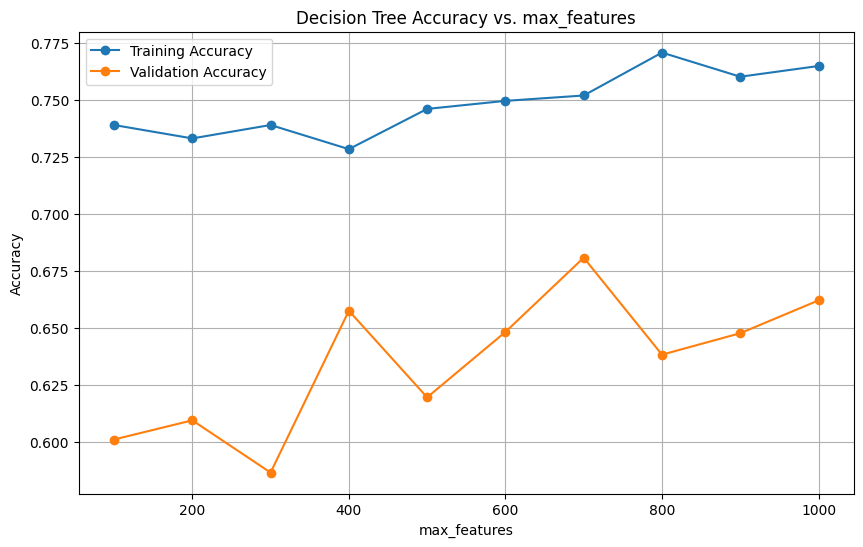

In [ ]:
# Create a line chart with both training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_features_values, results_df['avg_training_accuracy'], marker='o', label='Training Accuracy')
plt.plot(max_features_values, results_df['avg_validation_accuracy'], marker='o', label='Validation Accuracy')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. max_features')
plt.legend()
plt.grid(True)
plt.show()

# Using Random Forest

In [ ]:
# Define the number of trees (n_estimators) values to test
n_estimators_values = [10, 50, 100, 150, 200]

# Create a DataFrame to store the results
results_df_rf = pd.DataFrame(columns=['n_estimators', 'avg_training_accuracy', 'std_training_accuracy', 'avg_validation_accuracy', 'std_validation_accuracy'])

# Iterate through different n_estimators values
for n_estimators in n_estimators_values:
    # Create a Random Forest classifier with the specified n_estimators
    clf_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Perform 5-fold cross-validation for training accuracies
    train_accuracies_rf = cross_val_score(clf_rf, X_train, y_train, cv=5, scoring='accuracy')

    # Perform 5-fold cross-validation for validation accuracies
    val_accuracies_rf = cross_val_score(clf_rf, X_val, y_val, cv=5, scoring='accuracy')

    # Calculate the average and standard deviation of training accuracies
    avg_train_accuracy_rf = np.mean(train_accuracies_rf)
    std_train_accuracy_rf = np.std(train_accuracies_rf)

    # Calculate the average and standard deviation of validation accuracies
    avg_val_accuracy_rf = np.mean(val_accuracies_rf)
    std_val_accuracy_rf = np.std(val_accuracies_rf)

    # Append the results to the DataFrame
    results_df_rf = results_df_rf.append({
        'n_estimators': n_estimators,
        'avg_training_accuracy': avg_train_accuracy_rf,
        'std_training_accuracy': std_train_accuracy_rf,
        'avg_validation_accuracy': avg_val_accuracy_rf,
        'std_validation_accuracy': std_val_accuracy_rf
    }, ignore_index=True)

# Display the results in a table
print(results_df_rf)

<ipython-input-8-dba8a79acdc7>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_rf = results_df_rf.append({
<ipython-input-8-dba8a79acdc7>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_rf = results_df_rf.append({
<ipython-input-8-dba8a79acdc7>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_rf = results_df_rf.append({
<ipython-input-8-dba8a79acdc7>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_rf = results_df_rf.append({


   n_estimators  avg_training_accuracy  std_training_accuracy  \
0          10.0               0.865882               0.039965   
1          50.0               0.940000               0.013619   
2         100.0               0.944706               0.012113   
3         150.0               0.951765               0.017210   
4         200.0               0.943529               0.020241   

   avg_validation_accuracy  std_validation_accuracy  
0                 0.718605                 0.037197  
1                 0.868882                 0.039872  
2                 0.868882                 0.049549  
3                 0.873311                 0.054452  
4                 0.878073                 0.057654  


<ipython-input-8-dba8a79acdc7>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_rf = results_df_rf.append({


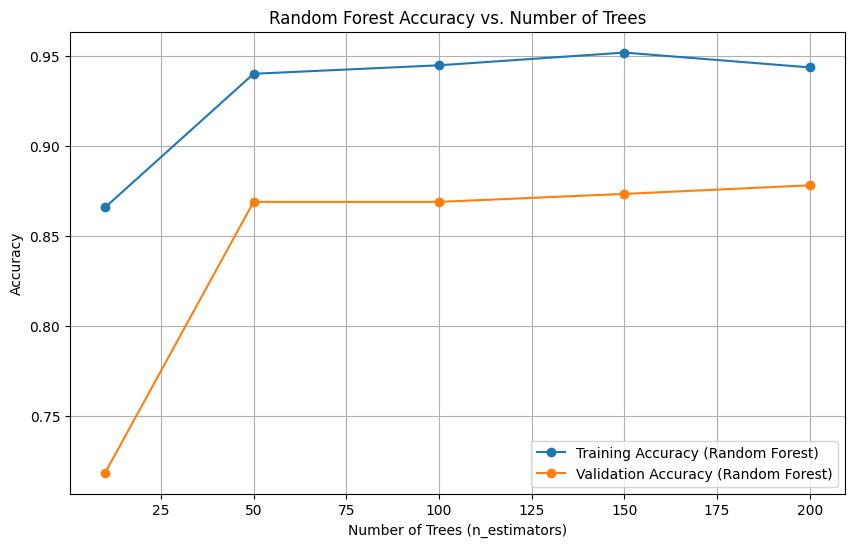

In [ ]:
# Create a line chart with both training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, results_df_rf['avg_training_accuracy'], marker='o', label='Training Accuracy (Random Forest)')
plt.plot(n_estimators_values, results_df_rf['avg_validation_accuracy'], marker='o', label='Validation Accuracy (Random Forest)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define the minimum samples at a leaf node (min_samples_leaf) values to test
min_samples_leaf_values_rf = [1, 5, 10, 20, 50]

# Create a DataFrame to store the results
results_df_rf_min_samples = pd.DataFrame(columns=['min_samples_leaf', 'avg_training_accuracy', 'std_training_accuracy', 'avg_validation_accuracy', 'std_validation_accuracy'])

# Iterate through different min_samples_leaf values
for min_samples_leaf_rf in min_samples_leaf_values_rf:
    # Create a Random Forest classifier with the specified min_samples_leaf
    clf_rf_min_samples = RandomForestClassifier(min_samples_leaf=min_samples_leaf_rf, random_state=42)

    # Perform 5-fold cross-validation for training accuracies
    train_accuracies_rf_min_samples = cross_val_score(clf_rf_min_samples, X_train, y_train, cv=5, scoring='accuracy')

    # Perform 5-fold cross-validation for validation accuracies
    val_accuracies_rf_min_samples = cross_val_score(clf_rf_min_samples, X_val, y_val, cv=5, scoring='accuracy')

    # Calculate the average and standard deviation of training accuracies
    avg_train_accuracy_rf_min_samples = np.mean(train_accuracies_rf_min_samples)
    std_train_accuracy_rf_min_samples = np.std(train_accuracies_rf_min_samples)

    # Calculate the average and standard deviation of validation accuracies
    avg_val_accuracy_rf_min_samples = np.mean(val_accuracies_rf_min_samples)
    std_val_accuracy_rf_min_samples = np.std(val_accuracies_rf_min_samples)

    # Append the results to the DataFrame
    results_df_rf_min_samples = results_df_rf_min_samples.append({
        'min_samples_leaf': min_samples_leaf_rf,
        'avg_training_accuracy': avg_train_accuracy_rf_min_samples,
        'std_training_accuracy': std_train_accuracy_rf_min_samples,
        'avg_validation_accuracy': avg_val_accuracy_rf_min_samples,
        'std_validation_accuracy': std_val_accuracy_rf_min_samples
    }, ignore_index=True)

# Display the results in a table
print(results_df_rf_min_samples)

<ipython-input-10-560d8cd55ed9>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_rf_min_samples = results_df_rf_min_samples.append({
<ipython-input-10-560d8cd55ed9>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_rf_min_samples = results_df_rf_min_samples.append({
<ipython-input-10-560d8cd55ed9>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_rf_min_samples = results_df_rf_min_samples.append({
<ipython-input-10-560d8cd55ed9>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_rf_min_samples = results_df_rf_min_samples.append({


   min_samples_leaf  avg_training_accuracy  std_training_accuracy  \
0               1.0               0.944706               0.012113   
1               5.0               0.931765               0.013720   
2              10.0               0.924706               0.015958   
3              20.0               0.904706               0.011998   
4              50.0               0.625882               0.029435   

   avg_validation_accuracy  std_validation_accuracy  
0                 0.868882                 0.049549  
1                 0.849612                 0.061089  
2                 0.690255                 0.025681  
3                 0.436545                 0.030128  
4                 0.338538                 0.057815  


<ipython-input-10-560d8cd55ed9>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_rf_min_samples = results_df_rf_min_samples.append({


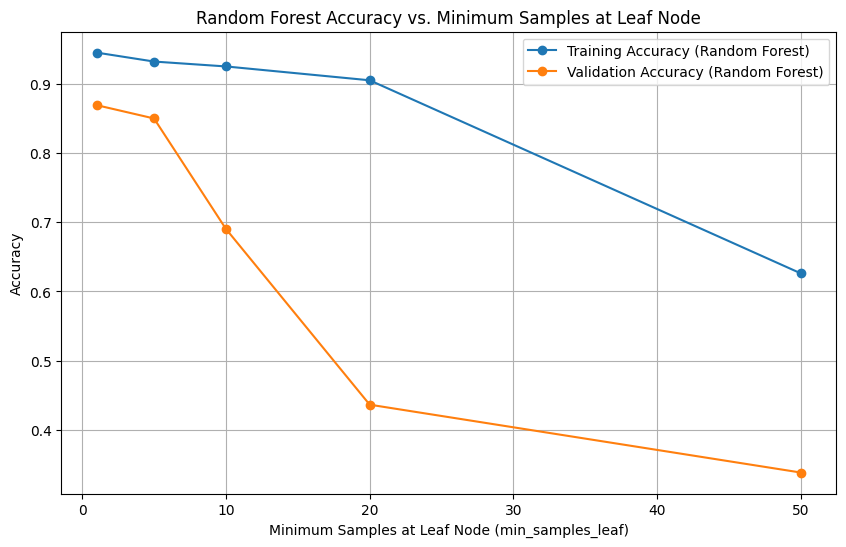

In [ ]:
# Create a line chart with both training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values_rf, results_df_rf_min_samples['avg_training_accuracy'], marker='o', label='Training Accuracy (Random Forest)')
plt.plot(min_samples_leaf_values_rf, results_df_rf_min_samples['avg_validation_accuracy'], marker='o', label='Validation Accuracy (Random Forest)')
plt.xlabel('Minimum Samples at Leaf Node (min_samples_leaf)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Minimum Samples at Leaf Node')
plt.legend()
plt.grid(True)
plt.show()

# Predicting Labels

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the training and testing data
train_data = pd.read_csv('news-train.csv')
test_data = pd.read_csv('news-test.csv')

# Preprocessing functions (same as before)
def clean_text(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word.isalpha()])
    return text

def tokenize_text(text):
    words = word_tokenize(text)
    return words

def remove_stop_words(words):
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# Apply preprocessing to both training and testing data
stop_words = set(stopwords.words('english'))
train_data['Text'] = train_data['Text'].apply(clean_text)
train_data['Text'] = train_data['Text'].apply(tokenize_text)
train_data['Text'] = train_data['Text'].apply(remove_stop_words)

test_data['Text'] = test_data['Text'].apply(clean_text)
test_data['Text'] = test_data['Text'].apply(tokenize_text)
test_data['Text'] = test_data['Text'].apply(remove_stop_words)

train_data['Text'] = train_data['Text'].apply(lambda x: ' '.join(x))
test_data['Text'] = test_data['Text'].apply(lambda x: ' '.join(x))

# TF-IDF Vectorization (same as before)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Text'])
y_train = train_data['Category']
X_test_tfidf = tfidf_vectorizer.transform(test_data['Text'])

# Initialize a Random Forest classifier with chosen parameters
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train_tfidf, y_train)

# Predict labels for the testing data
y_test_pred = rf_classifier.predict(X_test_tfidf)

# Generate labels.csv file
labels_df = pd.DataFrame({'ArticleId': test_data['ArticleId'], 'Category': y_test_pred})
labels_df.to_csv('labels.csv', index=False, header=False)


In [ ]:

# Predict labels for the training data
y_train_pred = rf_classifier.predict(X_train_tfidf)

# Calculate and print the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy:.4f}")


Training Accuracy: 1.0000


# Final Classification Model

In [ ]:
import string


# Load the training and testing data
train_data = pd.read_csv('news-train.csv')
test_data = pd.read_csv('news-test.csv')

# Function for text cleaning and preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply text preprocessing to the training and testing data
train_data['Text'] = train_data['Text'].apply(preprocess_text)
test_data['Text'] = test_data['Text'].apply(preprocess_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Text'])

# Ensure the testing data has the same features as the training data
X_test_tfidf = tfidf_vectorizer.transform(test_data['Text'])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, train_data['Category'], test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    results[name] = {'Training Accuracy': train_accuracy, 'Validation Accuracy': val_accuracy}

# Choose the best model based on validation accuracy
best_model = max(results, key=lambda k: results[k]['Validation Accuracy'])

# Train the best model on the full training data
best_classifier = classifiers[best_model]
best_classifier.fit(X_train_tfidf, train_data['Category'])

# Make predictions on the testing data
y_test_pred = best_classifier.predict(X_test_tfidf)

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'ArticleId': test_data['ArticleId'], 'Category': y_test_pred})

# Save predictions to a CSV file without a header
predictions_df.to_csv('labels.csv', index=False, header=False)

# Print the best model and its validation accuracy
print(f'Best Model: {best_model}')
print(f'Validation Accuracy of the Best Model: {results[best_model]["Validation Accuracy"]:.4f}')


Best Model: Gradient Boosting
Validation Accuracy of the Best Model: 0.9343
